In [1]:
%load_ext watermark
%watermark -v -n -m -p numpy,sklearn,pandas,openpyxl

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.4.0

numpy   : 1.23.2
sklearn : 1.1.2
pandas  : 1.4.3
openpyxl: 3.0.9

Compiler    : GCC 10.4.0
OS          : Linux
Release     : 5.15.0-46-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [43]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
from datetime import datetime

PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
print(PROJ_ROOT)

/home/fedesss/Dropbox/ML_to_ETa/eta_ml


In [11]:
df = pd.read_csv(PROJ_ROOT + '/data/interim/' + 'castelvetrano.csv', 
                 sep=';', decimal=',', 
                 index_col=0, 
                 parse_dates=True, infer_datetime_format=True, dayfirst=True,
                 na_values='#DIV/0!',
                )
df.head()

,NDVI,NDWI,ETa,Tmin,Tmax,Tmean,RHmin,RHmax,RHmean,Rs,Ws,Rain,ET0
Data,,,,,,,,,,,,,
2009-02-01,0.78,0.46,NaN,5.8,15.7,10.75,65.0,100.0,82.5,6.40,1.66,6.6,1.19
2009-02-02,0.78,0.46,NaN,10.2,18.0,14.10,45.0,100.0,72.5,8.02,4.25,0.0,2.42
2009-02-03,0.79,0.47,NaN,12.7,18.7,15.70,47.0,100.0,73.5,3.43,2.36,4.8,1.77
2009-02-04,0.76,0.43,NaN,6.3,17.2,11.75,61.0,100.0,80.5,9.95,0.82,1.0,1.25
2009-02-05,0.76,0.43,NaN,8.3,18.0,13.15,45.0,100.0,72.5,13.49,2.24,0.2,2.02


In [12]:
df.dtypes

NDVI      float64
NDWI      float64
ETa       float64
Tmin      float64
Tmax      float64
Tmean     float64
RHmin     float64
RHmax     float64
RHmean    float64
Rs        float64
Ws        float64
Rain      float64
ET0       float64
dtype: object

In [52]:
df = pd.read_excel(PROJ_ROOT + '/data/raw/' + 'Database_Castelvetrano.xlsx',
                   header=0, skiprows=5, index_col=0, usecols='A:C,E,G:P',
                   parse_dates=True,
                   decimal=',',
                  )
df.columns = ['NDVI', 'NDWI', 'ETa', 'Tmin', 'Tmax', 'Tmean', 'RHmin', 'RHmax', 'RHmean', 'Rs', 'Ws', 'Rain', 'ET0']
df

,NDVI,NDWI,ETa,Tmin,Tmax,Tmean,RHmin,RHmax,RHmean,Rs,Ws,Rain,ET0
Data,,,,,,,,,,,,,
2009-02-01,0.783,0.457203,NaN,5.8,15.7,10.75,65.0,100.0,82.5,6.40,1.66,6.6,1.192528
2009-02-02,0.783,0.457238,NaN,10.2,18.0,14.10,45.0,100.0,72.5,8.02,4.25,0.0,2.417155
2009-02-03,0.786,0.467682,NaN,12.7,18.7,15.70,47.0,100.0,73.5,3.43,2.36,4.8,1.765894
2009-02-04,0.757,0.431062,NaN,6.3,17.2,11.75,61.0,100.0,80.5,9.95,0.82,1.0,1.252462
2009-02-05,0.757,0.431562,NaN,8.3,18.0,13.15,45.0,100.0,72.5,13.49,2.24,0.2,2.022964
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.732,0.378874,NaN,2.3,12.5,7.40,71.0,100.0,85.5,5.50,0.92,6.2,0.670197
2020-12-28,0.740,0.377096,NaN,5.3,13.8,9.55,57.0,100.0,78.5,8.18,2.98,0.6,1.318732
2020-12-29,0.740,0.376979,NaN,6.4,15.9,11.15,71.0,100.0,85.5,8.51,2.05,0.0,0.987506


array([<AxesSubplot:xlabel='Data'>, <AxesSubplot:xlabel='Data'>,
       <AxesSubplot:xlabel='Data'>, <AxesSubplot:xlabel='Data'>,
       <AxesSubplot:xlabel='Data'>, <AxesSubplot:xlabel='Data'>,
       <AxesSubplot:xlabel='Data'>, <AxesSubplot:xlabel='Data'>,
       <AxesSubplot:xlabel='Data'>, <AxesSubplot:xlabel='Data'>,
       <AxesSubplot:xlabel='Data'>, <AxesSubplot:xlabel='Data'>,
       <AxesSubplot:xlabel='Data'>], dtype=object)

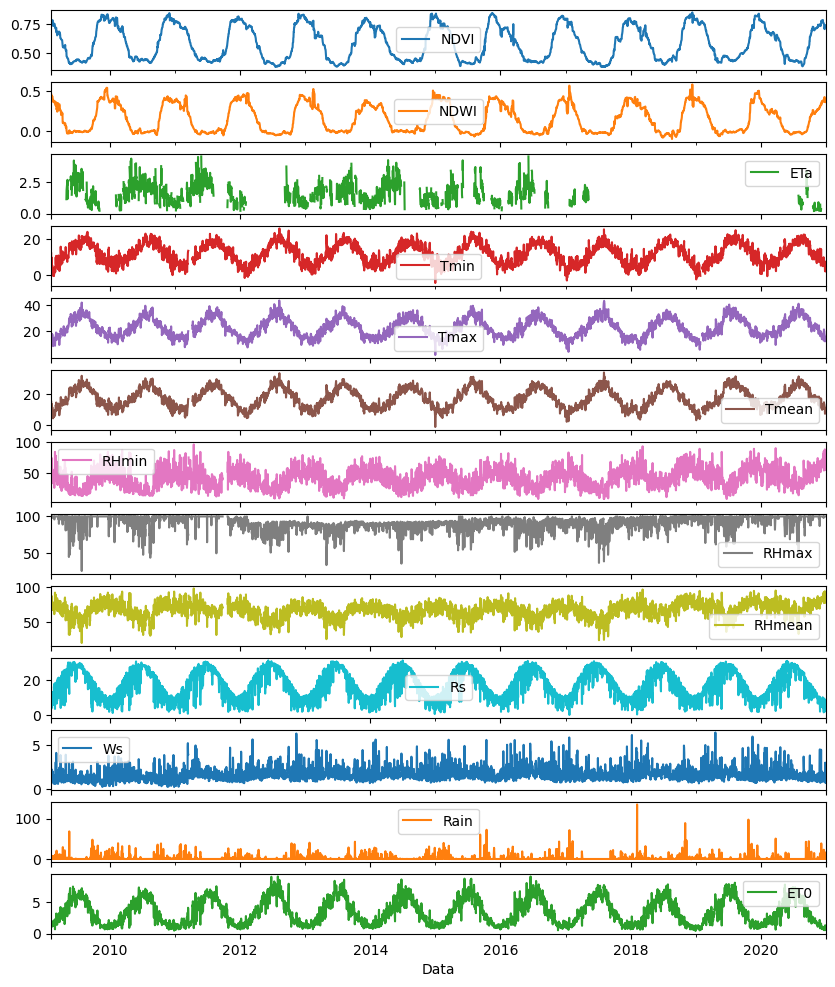

In [56]:
df.plot(subplots=True, figsize=(10,12))